In [13]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import neattext as ntx
import os
import emoji
import contractions

In [14]:
df = pd.read_csv('IRMiDis-2022\\2022\\vax_train.csv',encoding = "utf-8")
df.head(10)

,id,tweet,label
0,1329771561671417856,Today Pfizer said it's asking U.S. regulators ...,Neutral
1,1266030447919804420,Good news on development of new #covid19 #vacc...,ProVax
2,1238769307456172034,Once they get a corona vaccine I don’t want to...,ProVax
3,1328814394822705152,Free flu vaccines and COVID-19 tests! https://...,Neutral
4,1254610119876280320,"Bollywood Gupshup,Russian Researchers Will Tes...",ProVax
5,1326040550957588480,I will not be taking this COVID-19 vaccine. A ...,AntiVax
6,1325861441916833794,5) KEY thing to know—mRNA based Pfizer vaccine...,ProVax
7,1325919597795700736,"This is pretty good news, but of course there ...",ProVax
8,1325767708386816000,Huge news. Good for all of us regardless of ou...,ProVax
9,1329092054836678656,Dolly Parton’s $1 million donation helped fund...,Neutral


In [64]:
df.shape

(4392, 4)

In [10]:
val = df.groupby(['label']).count()
val['tweet']

label
AntiVax    1081
Neutral    1635
ProVax     1676
Name: tweet, dtype: int64

<BarContainer object of 3 artists>

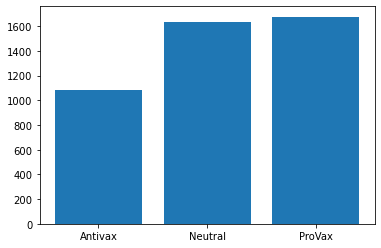

In [12]:
plt.bar(['Antivax','Neutral','ProVax'],val['tweet'])

# Cleaning tweets

In [16]:
df['clean_tweet'] = df['tweet'].apply(ntx.remove_urls)
df['clean_tweet'] = df['clean_tweet'].apply(ntx.remove_userhandles)
df['clean_tweet'] = df['clean_tweet'].apply(ntx.remove_special_characters)
df['clean_tweet'] = df['clean_tweet'].apply(emoji.demojize)

In [17]:
df['clean_tweet'] = df['clean_tweet'].apply(contractions.fix)

In [18]:
df.tweet.iloc[100]

"Three cheers for medical research!\nThe possibility of a vaccination against COVID-19 is a reminder how far health care has improved. Let's make sure everyone can benefit.\nHelp fund research to develop a vaccine against Alzheimer's. £10\nhttps://t.co/guzZRZtRrE https://t.co/99nFpApjYX"

In [19]:
df.clean_tweet.iloc[100]

'Three cheers for medical researchThe possibility of a vaccination against COVID19 is a reminder how far health care has improved Let Us make sure everyone can benefitHelp fund research to develop a vaccine against Alzheimers 10 '

In [20]:
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords
stemmer = SnowballStemmer("english")
lemmatizer = WordNetLemmatizer()

In [21]:
# function to remove stopwords
def stopWords(clean_tweet):
    clean_tweet = " ".join(word for word in clean_tweet.split() if word not in stopwords.words('english') )
    clean_tweet = " ".join(lemmatizer.lemmatize(word.lower()) for word in clean_tweet.split())
    #clean_tweet = " ".join(stemmer.stem(word.lower()) for word in clean_tweet.split())
    return clean_tweet
df['clean_tweet']= df['clean_tweet'].apply(lambda x : stopWords(x))

In [22]:
df[['tweet','clean_tweet']].iloc[20]

tweet          @NikkiHaley @pfizer @realDonaldTrump Nothing t...
clean_tweet              nothing trump delete tweet look foolish
Name: 20, dtype: object

In [23]:
df.tweet.iloc[20]

'@NikkiHaley @pfizer @realDonaldTrump Nothing to do with Trump. Delete tweet, you look foolish.'

In [24]:
df.clean_tweet.iloc[20]

'nothing trump delete tweet look foolish'

# Word Cloud Generation for visualization

In [39]:
#!pip install wordcloud
from wordcloud import WordCloud

In [40]:
def cloud_of_Words(tweet_cat,title):
    forcloud = ' '.join([tweet for tweet in tweet_cat])
    wordcloud = WordCloud(width =500,height = 300,random_state =5,max_font_size=110).generate(forcloud)
    plt.imshow(wordcloud, interpolation ='bilinear')
    plt.title(title)
    plt.axis('off')
    plt.show()
    plt.figure(figsize = (10,8))

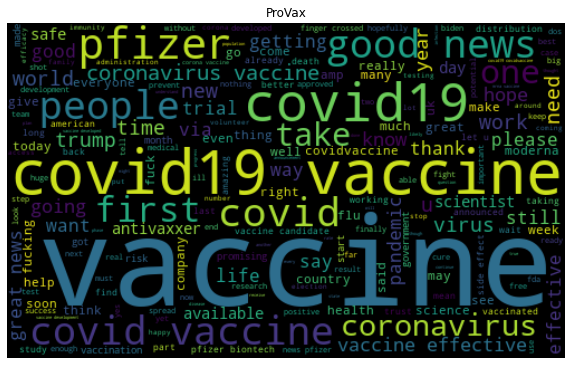

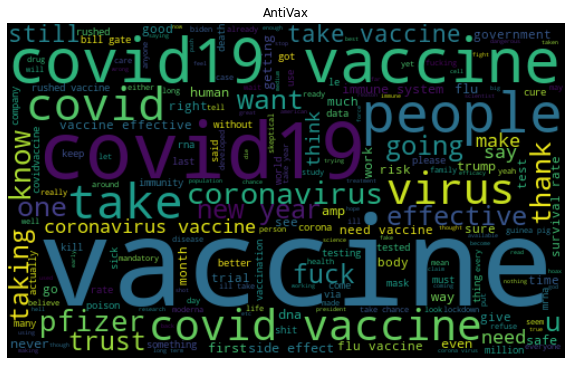

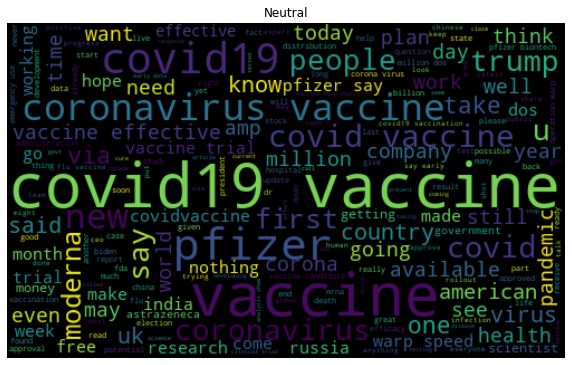

<Figure size 720x576 with 0 Axes>

In [41]:
# categorized tweets in seperate Series
provax =  df[df['label'] == 'ProVax']['clean_tweet']
antivax =  df[df['label'] == 'AntiVax']['clean_tweet']
neutral =  df[df['label'] == 'Neutral']['clean_tweet']
plt.figure(figsize = (10,8))
# Creating wordclouds for positive, negative, neutral tweets
cloud_of_Words(provax, 'ProVax')
cloud_of_Words(antivax, 'AntiVax')
cloud_of_Words(neutral, 'Neutral')

# Data Splitting

In [25]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [26]:
X = df['clean_tweet']
y = df['label']
encoder = preprocessing.LabelEncoder()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
y_train = encoder.fit_transform(y_train)

# Model implementation and  training

In [27]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from xgboost import XGBClassifier
from sklearn.pipeline import make_pipeline

In [74]:
len(y_train)

3513

In [32]:
X[100]

'three cheer medical researchthe possibility vaccination covid19 reminder far health care improved let u make sure everyone benefithelp fund research develop vaccine alzheimers 10'

In [51]:
vector = CountVectorizer()
vector2 = CountVectorizer()
X_encode= vector.fit_transform(X)
X_test_encode= vector2.fit_transform([X[100],X[200],X[50],X[51]])
print(X_test_encode.toarray().tolist())

[[1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0], [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 2, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0], [0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 2, 1, 1, 0, 0, 1]]


In [69]:
len(vector.vocabulary_)
X_encode

<4392x10439 sparse matrix of type '<class 'numpy.int64'>'
	with 65683 stored elements in Compressed Sparse Row format>

In [39]:
for i in X_encode[100].toarray():
    print(i)

[0 0 0 ... 0 0 0]


In [ ]:
print("Vocabulary: ", vector.vocabulary_)

In [17]:
model1 = make_pipeline(CountVectorizer(),XGBClassifier())
model1.fit(X_train,y_train)

Pipeline(steps=[('countvectorizer', CountVectorizer()),
                ('xgbclassifier',
                 XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               gamma=0, gpu_id=-1, grow_policy='depthwise',
                               importance_type=None, interaction_constraints='',
                               learning_rate=0.300000012, max_bin=256,
                               max_cat_to_onehot=4, max_delta_step=0,
                               max_depth=6, max_leaves=0, min_child_weight=1,
                               missing=nan, monotone_constraints='()',
                               n_estimators=100, n_jobs=0, num_parallel_tree=1,
                               objective='multi:softprob', predictor='auto',
                               random_state=0, reg_alpha=0, ...))])

In [18]:
pred = model1.predict(X_test)
convert = lambda x : "ProVax" if x == 2 else ("AntiVax" if x == 0 else "Neutral")
pred1 = []
for i in pred:
    pred1.append(convert(i))

<AxesSubplot:>

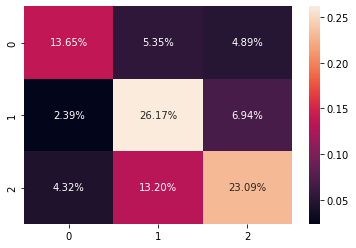

In [20]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns
mat = confusion_matrix(y_test,pred)
report = classification_report(y_test,pred)
sns.heatmap(mat/np.sum(mat), annot=True, 
            fmt='.2%')

In [19]:
print(report)

              precision    recall  f1-score   support

     AntiVax       0.67      0.57      0.62       210
     Neutral       0.59      0.74      0.65       312
      ProVax       0.66      0.57      0.61       357

    accuracy                           0.63       879
   macro avg       0.64      0.63      0.63       879
weighted avg       0.64      0.63      0.63       879



# Hyperparameter tuning for  XGboost

## Optimization with RandomSearchCV

In [73]:
from sklearn.model_selection import RandomizedSearchCV
classifier=XGBClassifier()

In [ ]:
vector = CountVectorizer()
X_encode= vector.fit_transform(X)
y_encode = encoder.fit_transform(y)
params={
 "learning_rate"    : [0.03,0.05, 0.10, 0.15, 0.20, 0.25, 0.30,0.300000012,0.4 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7,0.8,0.9,1]    
}
random_search=RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,scoring='f1_macro',n_jobs=-1,cv=5,verbose=3)
random_search.fit(X_encode,y_encode)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, gamma=None,
                                           gpu_id=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None, max_bin=None,...
                                           num_parallel_tree=None,
                                           predictor=None, random_state=None,
                                           reg_alpha=None, reg_lambda=None, ...),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5, 0.7,
                                                             0.8, 0.9, 1],
                                        'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                                        'learning_rate': [0.03, 0.05, 0.1, 0.15,
                                                          0.2, 0.25, 0.3,
                                                          0.300000012, 0.4],
                                        'max_depth': [3, 4, 5, 6, 8, 10, 12,
                                                      15],
                                        'min_child_weight': [1, 3, 5, 7]},
                   scoring='f1_macro', verbose=3)

In [83]:
params = random_search.best_params_
params

{'min_child_weight': 1,
 'max_depth': 12,
 'learning_rate': 0.1,
 'gamma': 0.4,
 'colsample_bytree': 0.9}

In [84]:
model = XGBClassifier()
model.set_params(**params)
model1 = make_pipeline(CountVectorizer(),model)
model1.fit(X_train,y_train)

Pipeline(steps=[('countvectorizer', CountVectorizer()),
                ('xgbclassifier',
                 XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=0.9, early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               gamma=0.4, gpu_id=-1, grow_policy='depthwise',
                               importance_type=None, interaction_constraints='',
                               learning_rate=0.1, max_bin=256,
                               max_cat_to_onehot=4, max_delta_step=0,
                               max_depth=12, max_leaves=0, min_child_weight=1,
                               missing=nan, monotone_constraints='()',
                               n_estimators=100, n_jobs=0, num_parallel_tree=1,
                               objective='multi:softprob', predictor='auto',
                               random_state=0, reg_alpha=0, ...))])

In [85]:
result = model1.predict(X_test)
pred1 = []
for i in result:
    pred1.append(convert(i))

              precision    recall  f1-score   support

     AntiVax       0.67      0.55      0.60       210
     Neutral       0.58      0.76      0.66       312
      ProVax       0.67      0.56      0.61       357

    accuracy                           0.63       879
   macro avg       0.64      0.62      0.62       879
weighted avg       0.64      0.63      0.63       879



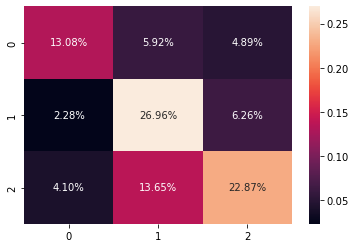

In [86]:
mat = confusion_matrix(y_test,pred1)
report = classification_report(y_test,pred1)
sns.heatmap(mat/np.sum(mat), annot=True, 
            fmt='.2%')
print(report)

## Bayesian Optimization with HYPEROPT

In [131]:
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe
from sklearn.metrics import accuracy_score

In [209]:
space={ 'objective':'multi:softmax',
        'learning_rate':hp.uniform('learning_rate',0.1,0.4),
        'max_depth': hp.quniform("max_depth", 3, 18, 1),
        'gamma': hp.uniform ('gamma', 0,9),
        'reg_alpha' : hp.quniform('reg_alpha', 0,1,1),
        'reg_lambda' : hp.uniform('reg_lambda', 0,1),
        'colsample_bytree' : hp.uniform('colsample_bytree', 0.5,1),
        'min_child_weight' : hp.quniform('min_child_weight', 0, 10, 1),
        'n_estimators': 180,
        'seed': 0
    }

In [210]:
vectorizer = CountVectorizer()
vectorizer.fit(X)
X_2 = vectorizer.transform(X)
y_2 = encoder.fit_transform(y)
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.20, random_state=42)
def objective(space):
    clf=XGBClassifier(objective = space['objective'],learning_rate = space['learning_rate'],
                    n_estimators =space['n_estimators'], max_depth = int(space['max_depth']), gamma = space['gamma'],
                    reg_alpha = int(space['reg_alpha']),min_child_weight=int(space['min_child_weight']),
                    colsample_bytree=int(space['colsample_bytree']))
    
    evaluation = [( X_train_2, y_train_2), ( X_test_2, y_test_2)]
    
    clf.fit(X_train_2, y_train_2,
             eval_set=evaluation,eval_metric="auc",
            early_stopping_rounds=10,verbose=False)
    
    pred = clf.predict(X_test_2)
    accuracy = accuracy_score(y_test_2, pred)
    print ("SCORE:", accuracy)
    return {'loss': -accuracy, 'status': STATUS_OK }

In [211]:
print(X_train_2.shape)

(3513, 10439)


In [ ]:
trials = Trials()

best_hyperparams = fmin(fn = objective,
                        space = space,
                        algo = tpe.suggest,
                        max_evals = 100,
                        trials = trials)

In [218]:
print("The best hyperparameters are : ","\n")
print(best_hyperparams)

The best hyperparameters are :  

{'colsample_bytree': 0.7281704443843204, 'gamma': 0.24728061277513913, 'learning_rate': 0.3994722661863012, 'max_depth': 5.0, 'min_child_weight': 0.0, 'reg_alpha': 0.0, 'reg_lambda': 0.6148225282687034}


In [17]:
from xgboost import plot_tree

In [16]:
model = XGBClassifier()
best_hyperparams = {'colsample_bytree': 0.7281704443843204, 'gamma': 0.24728061277513913, 'learning_rate': 0.3994722661863012, 'max_depth': 5, 'min_child_weight': 0.0, 'reg_alpha': 0.0, 'reg_lambda': 0.6148225282687034}
best_hyperparams['objective']='multi:softproba'
model.set_params(**best_hyperparams)
model2 = make_pipeline(CountVectorizer(),model)
model2.fit(X_train,y_train)

Pipeline(steps=[('countvectorizer', CountVectorizer()),
                ('xgbclassifier',
                 XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=0.7281704443843204,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               gamma=0.24728061277513913, gpu_id=-1,
                               grow_policy='depthwise', importance_type=None,
                               interaction_constraints='',
                               learning_rate=0.3994722661863012, max_bin=256,
                               max_cat_to_onehot=4, max_delta_step=0,
                               max_depth=5, max_leaves=0, min_child_weight=0.0,
                               missing=nan, monotone_constraints='()',
                               n_estimators=100, n_jobs=0, num_parallel_tree=1,
                               objective='multi:softprob', predictor='auto',
                               random_state=0, reg_alpha=0.0, ...))])

AttributeError: 'Pipeline' object has no attribute 'get_dump'

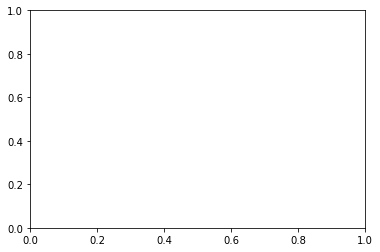

In [23]:
plot_tree(model); plt.show()


In [26]:
result2 = model2.predict(X_test)
convert = lambda x : "ProVax" if x == 2 else ("AntiVax" if x == 0 else "Neutral")
pred1 = []
for i in result2:
    pred1.append(convert(i))

              precision    recall  f1-score   support

           0       0.69      0.60      0.64       210
           1       0.58      0.75      0.66       312
           2       0.69      0.57      0.63       357

    accuracy                           0.64       879
   macro avg       0.65      0.64      0.64       879
weighted avg       0.65      0.64      0.64       879



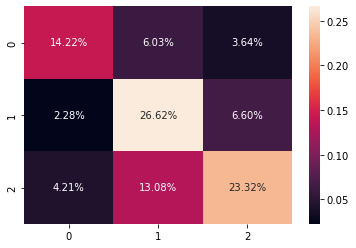

In [27]:
y_test = encoder.fit_transform(y_test)
mat = confusion_matrix(y_test,result2)
report = classification_report(y_test,result2)
sns.heatmap(mat/np.sum(mat), annot=True, 
            fmt='.2%')
print(report)

In [42]:
df2 = pd.read_csv("C:\\Users\\Kaustav Das\\Desktop\\Covid analysic\\covid-19-vaccination-stance-detection\\2022_test\\2022_test\\vax_test.csv")
df2['clean_tweet'] = df2['tweet'].apply(ntx.remove_urls)
df2['clean_tweet'] = df2['clean_tweet'].apply(ntx.remove_userhandles)
df2['clean_tweet'] = df2['clean_tweet'].apply(ntx.remove_special_characters)
df2['clean_tweet'] = df2['clean_tweet'].apply(emoji.demojize)
df2['clean_tweet'] = df2['clean_tweet'].apply(contractions.fix)
def stopWords(clean_tweet):
    clean_tweet = " ".join(word for word in clean_tweet.split() if word not in stopwords.words('english') )
    clean_tweet = " ".join(lemmatizer.lemmatize(word.lower()) for word in clean_tweet.split())
    #clean_tweet = " ".join(stemmer.stem(word.lower()) for word in clean_tweet.split())
    return clean_tweet
df2['clean_tweet']= df2['clean_tweet'].apply(lambda x : stopWords(x))

In [224]:
results2 = model2.predict(df2['clean_tweet'])
prediction = []
for i in results2:
    prediction.append(convert(i))

In [225]:
df2.drop(columns=['clean_tweet','tweet'],inplace = True)
df2.insert(1,'label',prediction,True)

In [226]:
df2.head()

,id,label
0,1472958183882719233t,AntiVax
1,1449995880904470529t,ProVax
2,1480413964265660416t,AntiVax
3,1408119497962057742t,Neutral
4,1439361704320806915t,Neutral


In [227]:
df2.to_csv('vax_test_XGBCV.csv')

In [228]:
df2.label

0      AntiVax
1       ProVax
2      AntiVax
3      Neutral
4      Neutral
        ...   
712     ProVax
713     ProVax
714    AntiVax
715     ProVax
716    Neutral
Name: label, Length: 717, dtype: object

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
vectorizer = CountVectorizer()
def cosine (txt,label):
    max_cosine = -99999999
    for i in df[df['label']==label]['clean_tweet']:
        data = [txt,i]
        vector = vectorizer.fit_transform(data)
        max_cosine = np.max([max_cosine,cosine_similarity(vector)[0][1]])
    return max_cosine
        
def func(i):
        provax = np.log(model2.predict_proba([i])[0][2]) + (np.log(cosine(i,'ProVax')))
        antivax = np.log(model2.predict_proba([i])[0][0]) +  (np.log(cosine(i,'AntiVax')))
        neutral = np.log(model2.predict_proba([i])[0][1]) +  (np.log(cosine(i,'Neutral')))
        if provax == np.max([provax,antivax,neutral]):
            print('ProVax')
            return 'ProVax'
        elif antivax == np.max([provax,antivax,neutral]):
            print('AntiVax')
            return 'AntiVax'
        else:
            print('Neutral')
            return 'Neutral'
result = df2['clean_tweet'].apply(lambda x : func(x))
print(result)

In [47]:
df2.insert(1,'label',result,True)
df2.drop(columns=['tweet','clean_tweet'],inplace=True)

In [48]:
df2.head()

,id,label,label
0,1472958183882719233t,AntiVax,AntiVax
1,1449995880904470529t,ProVax,ProVax
2,1480413964265660416t,AntiVax,AntiVax
3,1408119497962057742t,Neutral,Neutral
4,1439361704320806915t,Neutral,Neutral


In [53]:
df2.iloc[:,0:2].to_csv('vax_test_XGBCV_cosine_similarity_2.csv')

In [40]:
model2.predict_proba([X_test[4159]])                                            

array([[0.24170242, 0.25386354, 0.504434  ]], dtype=float32)

In [36]:
X_test

4159    is ability get vaccination exponential curve d...
3610    i have heard volunteer train administer covid ...
1769    other country following uk approve pfizerbiont...
414     how walking corpse explain american for prospe...
3855    this vaccine like flu shot true vaccine it mak...
                              ...                        
2357    wa not vaccine promised election guy texan vot...
3721    a getting better treating covid must learn ear...
4284    fuck off pfizer biontech say final analysis sh...
1406    got funny feeling rushed vaccine news year tim...
2414    china xi jinping pledged work country accelera...
Name: clean_tweet, Length: 879, dtype: object

In [ ]:
y_test

In [161]:
import gensim
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize

text = []
text = df['tweet'].apply(ntx.remove_urls)
text = text.apply(ntx.remove_userhandles)
text = text.apply(emoji.demojize)
text = text.apply(contractions.fix)
text = text.apply(str.lower)
#text = text.apply(lambda x: x.split())
#text = text.apply(lambda x: x.split(", "))
#text = text.apply(gensim.utils.simple_preprocess)
def lemmatization(lemm):
    lemm = " ".join(lemmatizer.lemmatize(word) for word in lemm.split())
    return lemm
text = text.apply(lambda x : lemmatization(x))
text = text.apply(lambda x : word_tokenize(x))
text = [[re.sub('[^a-zA-Z0-9]+', '', _) for _ in x]for x in text]

In [ ]:
print(text)

In [163]:
#w2v = Word2Vec(sentences=text, vector_size=100, window=5, min_count=1, workers=4)
w2v.save("word2vec.model")

In [164]:
w2v.build_vocab(text,progress_per=1000)
w2v.corpus_count

4392

In [165]:
w2v.train(text, total_examples = w2v.corpus_count, epochs = model.epochs)

(451155, 686415)

In [ ]:
w2v.wv.get_vector([X])

In [89]:
df.tweet[4387]

'👇👇Not a good practice, not good for public trust in vaccines ...  However, "scientific" press releases seem to be good for the stock market 🤷🏻\u200d♀️ https://t.co/qZaNZNhWLs'

In [196]:
xgbmodel = XGBClassifier()
A = df['clean_tweet']
B = df['label']
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(A, B, test_size=0.20, random_state=42)
y_train_3 = encoder.fit_transform(y_train_3)
w2v.wv.

In [ ]:
xgbmodel.set_params(**best_hyperparams)
model3 = make_pipeline(w2v,xgbmodel)
xgbmodel.fit(X_train_2, y_train_2,
             eval_set=evaluation,eval_metric="auc",
            early_stopping_rounds=10,verbose=False)